# GMS Intro to Stats
## Excercise 1: Tests of significance and correlations
### Looking at the minor allele frequency for 5000 introgressed neaderthal SNPs in modern humans

#### Neanderthal SNPs from:
1.	Dannemann M, Prufer K & Kelso J. Functional implications of Neandertal introgression in modern humans. *Genome Biol* 2017 18:61.
2.	Simonti CN et al. The phenotypic legacy of admixture between modern humans and Neandertals. *Science* 2016 351:737-41.

#### Minor allele frequencies from:
+ [1000 genomes](http://www.internationalgenome.org/data)
    - [With five super populatuions and 26 specific populations](http://www.internationalgenome.org/category/population/)


In [1]:
# Import the packages we need
# Manipulate the data
import pandas as pd
import numpy as np
import scipy as sp
# Plot the data
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes
import seaborn as sns
sns.set()

In [2]:
# Import the data - European 
eur = pd.read_csv('neanderthal_snps_european_maf_1000genome.tsv', index_col=0, sep='\t')

In [3]:
# Summary statistics
eur.describe()

,European
count,4982.000000
mean,0.068353
std,0.058910
min,0.000000
25%,0.025800
50%,0.050700
75%,0.092400
max,0.384700


<AxesSubplot:ylabel='Count'>

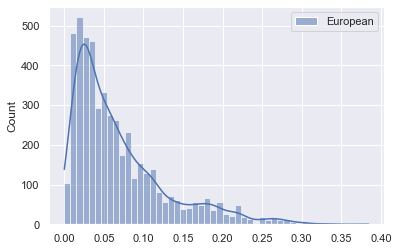

In [4]:
# What does it look like?
sns.histplot(eur, kde=True)

In [5]:
# Looks normal, is it normal?
print(sp.stats.normaltest(eur))

NormaltestResult(statistic=array([1310.74667956]), pvalue=array([2.37123691e-285]))


In [6]:
# Now lets import the African MAFs
afr = pd.read_csv('neanderthal_snps_african_maf_10000genome.tsv', index_col=0, sep='\t')

/Users/jpw/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

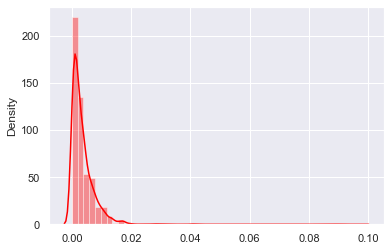

In [7]:
sns.distplot(afr, color='red')

In [8]:
print(sp.stats.normaltest(afr))

NormaltestResult(statistic=array([6630.74828383]), pvalue=array([0.]))


+ We want to compare the European and African MAFs for the neanderthal SNPs:
    - What is our hypothesis?
    - What would lead us to reject this?

In [9]:
# How about non-parametric tests
# print('Mann-Whitney rank test')
# print(sp.stats.mannwhitneyu(eur,afr))
# print('Kruskal-Wallis test')
# print(sp.stats.ks_2samp(eur['European'].values,afr['African'].values))
print('Wilcoxon signed rank test')
print(sp.stats.wilcoxon(eur['European'],afr['African']))

Wilcoxon signed rank test
WilcoxonResult(statistic=9533.5, pvalue=0.0)


 + The European minor allele frequencies is significantly 'bigger' than the African minor allele frequencies.
     - Is this what we expected? What do we mean by significant?
 + Are they correlated?

In [10]:
# Work out by hand the correlation between European and African MAF for neanderthal SNPs
eur_afr = pd.concat([eur, afr], axis=1)
mean_eur = np.mean(eur_afr['European'])
mean_afr = np.mean(eur_afr['African'])

eur_afr['Eur - mean_eur'] = eur_afr['European'] - mean_eur
eur_afr['Afr - mean_afr'] = eur_afr['African'] - mean_afr
eur_afr['E-m_e * A-a_e'] = eur_afr['Eur - mean_eur'] * eur_afr['Afr - mean_afr']
eur_afr['Eur - mean_eur ^2'] = eur_afr['Eur - mean_eur']**2
eur_afr['Afr - mean_afr ^2'] = eur_afr['Afr - mean_afr']**2

corr_coeff = sp.sum(eur_afr['E-m_e * A-a_e']) / (np.sqrt(sum(eur_afr['Eur - mean_eur ^2'])) * np.sqrt(sum(eur_afr['Afr - mean_afr ^2'])))
print(corr_coeff)

0.5685197133044374


/Users/jpw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  if sys.path[0] == '':


In [11]:
# Or just work out, including Spearmans rank coefficient
print(sp.stats.pearsonr(eur['European'].values,afr['African'].values))
print(sp.stats.spearmanr(eur,afr))

(0.5685197133044364, 0.0)
SpearmanrResult(correlation=0.718036441589098, pvalue=0.0)


In [12]:
all_pop = pd.read_csv('neanderthal_snps_maf_10000genome.tsv', index_col=0, sep='\t')
all_pop[['African', 'American', 'East_Asian', 'European', 'South_Asian']].describe()

,African,American,East_Asian,European,South_Asian
count,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,0.003626,0.059260,0.046712,0.068353,0.053066
std,0.004602,0.066181,0.082153,0.058910,0.053343
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000800,0.017300,0.000000,0.025800,0.015300
50%,0.002300,0.036000,0.005000,0.050700,0.036800
75%,0.004500,0.077800,0.055600,0.092400,0.074600
max,0.097600,0.456800,0.483100,0.384700,0.401800


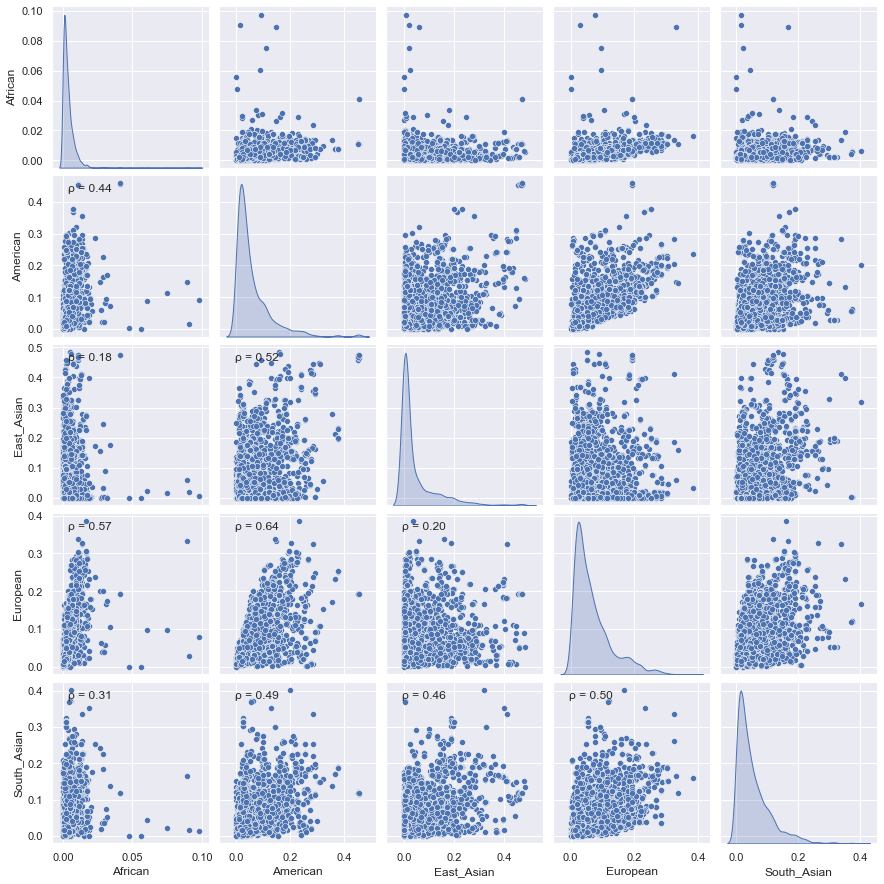

In [13]:
# Define the correlation coefficient so we can plot it for each comparison
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(u"\u03C1 = {:.2f}".format(r), #unicode code for lowercase rho (ρ)
                xy=(.1, .9), xycoords=ax.transAxes)

# Plot a pairplot comparing the MAFs for the super populations
g = sns.pairplot(all_pop[['African', 'American', 'East_Asian', 'European', 'South_Asian']], diag_kind="kde")
g.map_lower(corrfunc)
plt.show()

In [14]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(eur['European'].values,afr['African'].values)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.044412    intercept: 0.000590


+ Why are any neanderthal SNPs seen in African populations (MAF > 0)?
    - Is this true for the African subpopulations in 1000 genomes?

In [15]:
# Import the individual African population MAF for the neanderthal SNPs?
afr_pop = pd.read_csv('neanderthal_snps_african_specific_maf_10000genome.tsv', index_col=0, sep='\t')
afr_pop[['Yoruba', 'Luhya', 'Gambian', 'Mende', 'Esan', 'American', 'Caribbean']].describe()

,Yoruba,Luhya,Gambian,Mende,Esan,American,Caribbean
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,0.000161,0.002236,0.001755,0.001025,0.000478,0.015983,0.007929
std,0.003180,0.006346,0.005286,0.004505,0.003917,0.017003,0.009765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.008000,0.005000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.010000
max,0.111000,0.167000,0.115000,0.106000,0.121000,0.123000,0.125000


Text(0, 0.5, 'Allele freq')

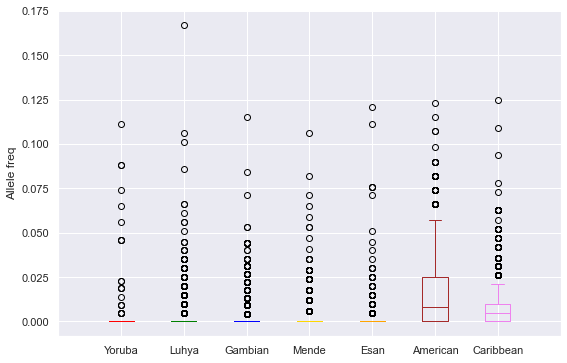

In [16]:
# The range of MAFs for the African populations is nicely shown by a boxplot
xticklabs = ['Yoruba', 'Luhya', 'Gambian', 'Mende', 'Esan', 'American', 'Caribbean']
colors=['red','green','blue','gold', 'orange', 'brown', 'violet', 'gray']
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
for i,item in enumerate(xticklabs):
    # All
    values = afr_pop[item].values
    
    color = colors[i]
    def setBoxColors(bp):
        setp(bp['boxes'][0], color=color)
        setp(bp['caps'][0], color=color)
        setp(bp['caps'][1], color=color)
        setp(bp['whiskers'][0], color=color)
        setp(bp['whiskers'][1], color=color)
        setp(bp['medians'][0], color=color)
    bp = ax.boxplot(values, positions = [(i)], widths=0.4)
    setBoxColors(bp)
    x = np.random.normal((i), 0.04, size=len(values))
#     pn = ax.scatter(x, values, marker='.', color=color, alpha=0.2)


ax.set_xticklabels(xticklabs) 
ax.set_xticks(range(len(xticklabs)))
ax.set_xlim(-1,len(xticklabs))

ax.set_ylabel('Allele freq')

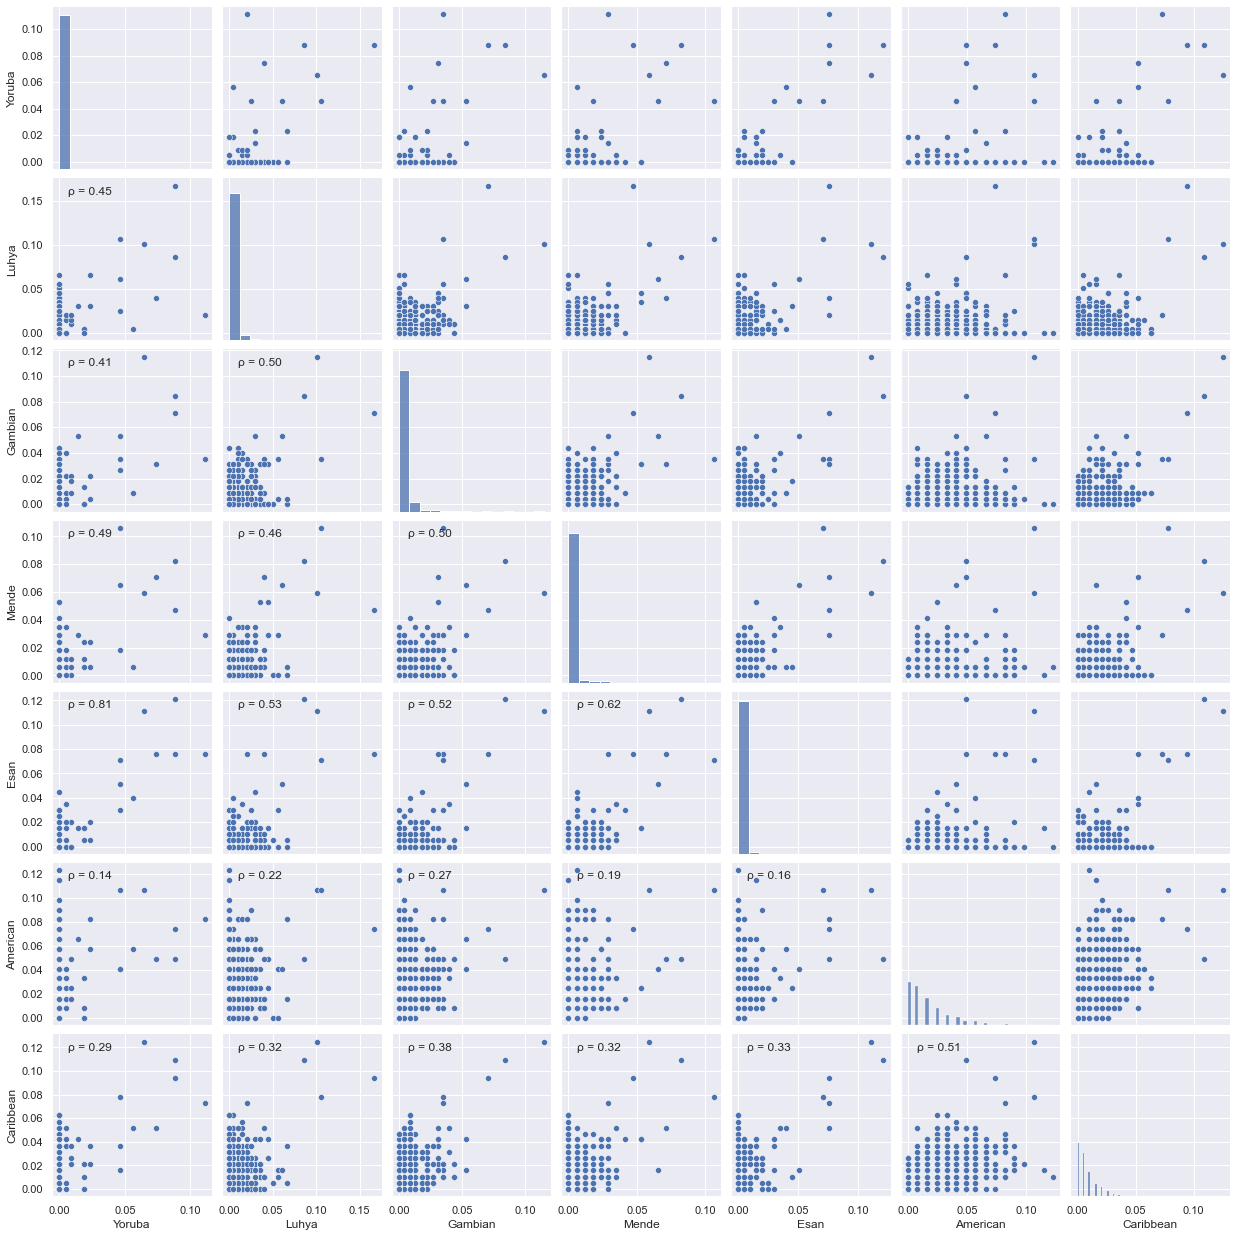

In [17]:
# Also look at their correlations
g = sns.pairplot(afr_pop[['Yoruba', 'Luhya', 'Gambian', 'Mende', 'Esan', 'American', 'Caribbean']])
g.map_lower(corrfunc)
plt.show()